In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import corner
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook
from collections import OrderedDict
from mosfit.plotting import bandcolorf

sns.reset_orig()

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 14})

We think of the 2 component model:

Red, Type 0: M = 0.04 v = 0.1 X = 1e-2

Blue, Type 1: M = 0.025 v = 0.3 X = 1e-4

First, I created a single component model (kasen_single) which allows me to plot observations from the SED as -is: no weighing. So below, we see the spherical red and spherical blue. Then, we see their superposition. This is if they were SPHERES though, so don't take this too seriously. This is just to show that they ARE different.

In [2]:
# Read in red single
with open('./singles/red/products/walkers.json', 'r') as f:
    data = json.loads(f.read())
    if 'name' not in data:
        data = data[list(data.keys())[0]]
red = data['photometry']
# Read in blue single
with open('./singles/blue/products/walkers.json', 'r') as f:
    data = json.loads(f.read())
    if 'name' not in data:
        data = data[list(data.keys())[0]]
blue = data['photometry']

In [3]:
red_time = []
red_mag = []
for i in red:
    red_time.append(float(i['time']))
    red_mag.append(float(i['magnitude']))
    
blue_time = []
blue_mag = []
for i in blue:
    blue_time.append(float(i['time']))
    blue_mag.append(float(i['magnitude']))

Text(0.5,1,'DECam i-band')

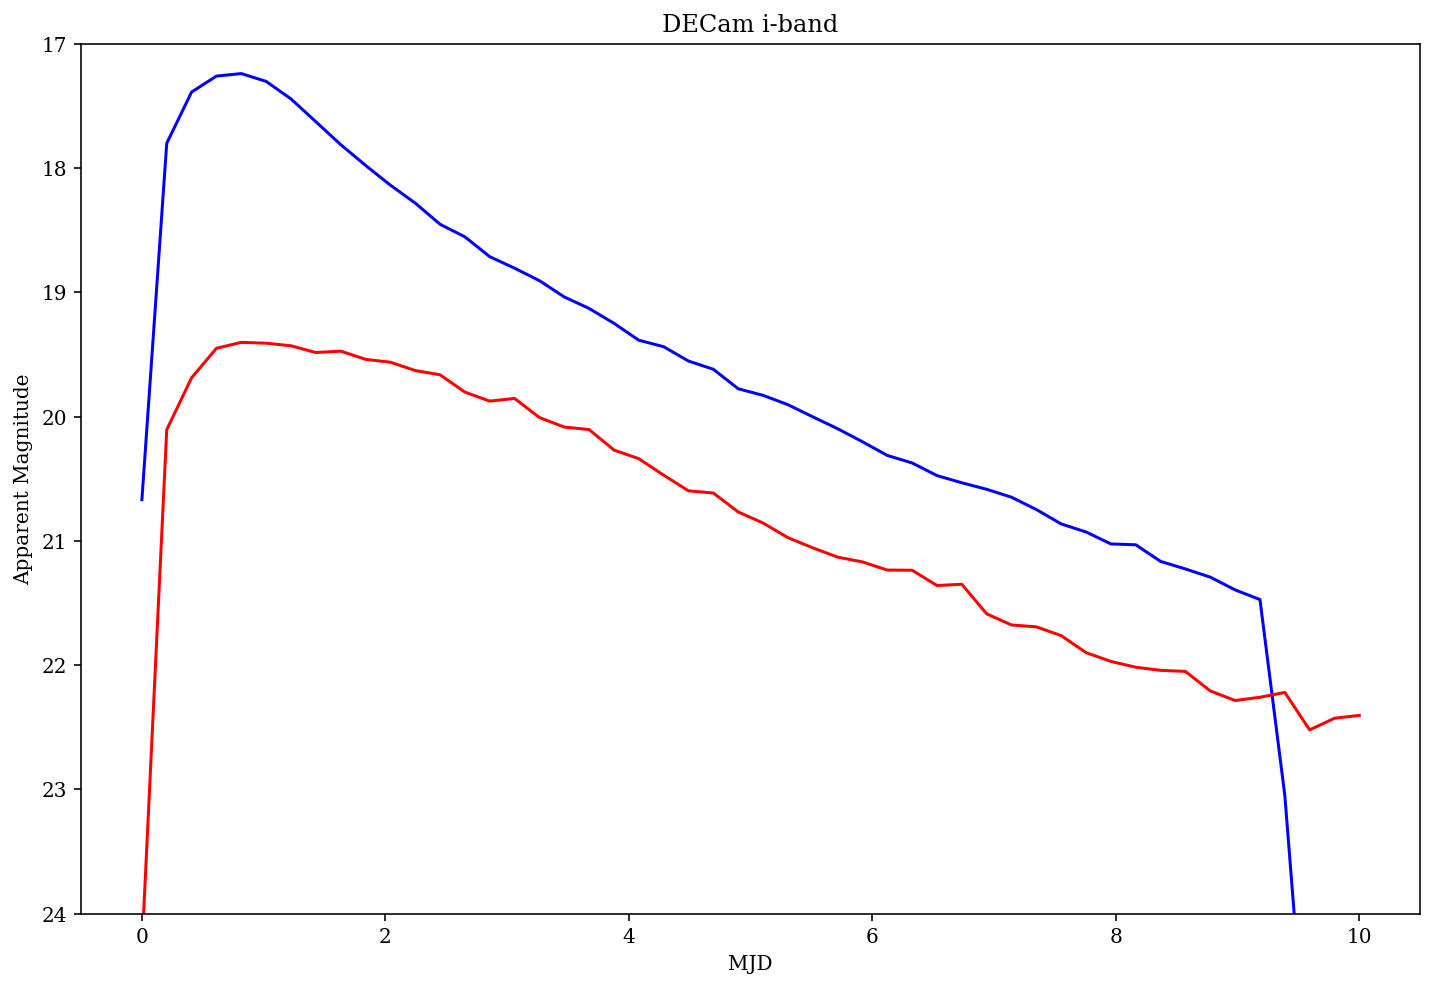

In [4]:
fig = plt.figure(figsize=(12,8))
plt.gca().invert_yaxis()
plt.gca().set_ylim(bottom=24, top=17)
plt.gca().set_xlabel('MJD')
plt.gca().set_ylabel('Apparent Magnitude')

plt.plot(blue_time, blue_mag, 'b-', label='Blue')
plt.plot(red_time, red_mag, 'r-', label='Red')
plt.title('DECam i-band')

Now I used the same components,but with theta (viewing angle) = 40, and phi (half opening angle) = 30 and weighted each component individually. Same physical parameters.

In [5]:
# Read in red single 
with open('./singles_weighted//red/products/walkers.json', 'r') as f:
    data = json.loads(f.read())
    if 'name' not in data:
        data = data[list(data.keys())[0]]
red = data['photometry']
# Read in blue single
with open('./singles_weighted//blue/products/walkers.json', 'r') as f:
    data = json.loads(f.read())
    if 'name' not in data:
        data = data[list(data.keys())[0]]
blue = data['photometry']

red_time_w = []
red_mag_w = []
for i in red:
    red_time_w.append(float(i['time']))
    red_mag_w.append(float(i['magnitude']))
    
blue_time_w = []
blue_mag_w = []
for i in blue:
    blue_time_w.append(float(i['time']))
    blue_mag_w.append(float(i['magnitude']))

Text(0.5,1,'DECam i-band')

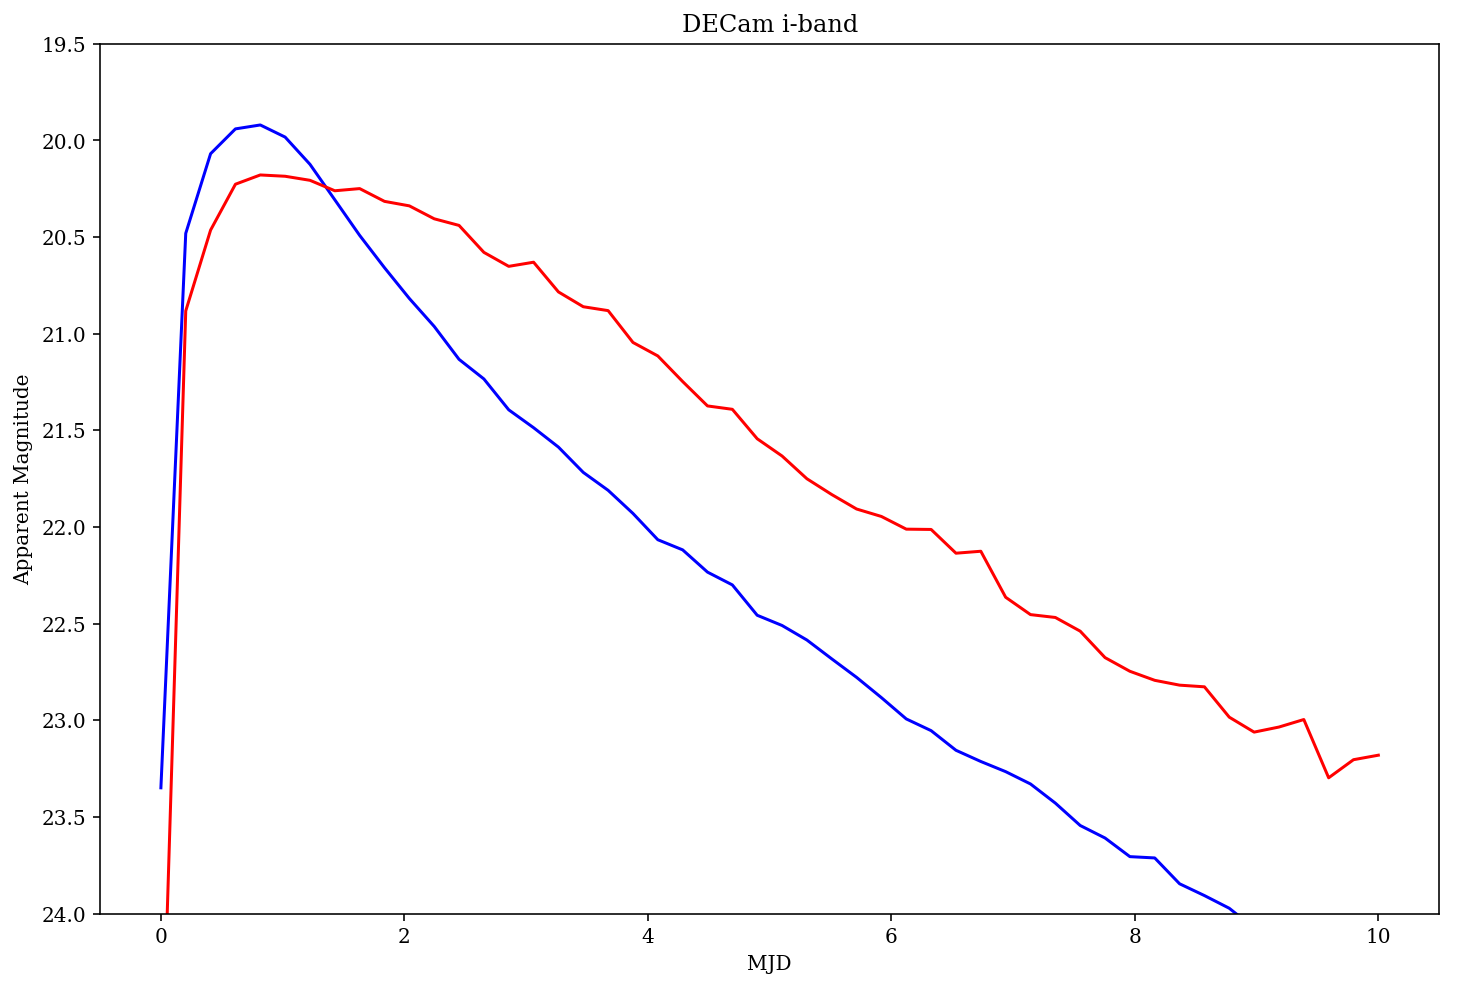

In [6]:
fig = plt.figure(figsize=(12,8))
plt.gca().invert_yaxis()
plt.gca().set_ylim(bottom=24, top=19.5)
plt.gca().set_xlabel('MJD')
plt.gca().set_ylabel('Apparent Magnitude')

plt.plot(blue_time_w, blue_mag_w, 'b-', label='Blue')
plt.plot(red_time_w, red_mag_w, 'r-', label='Red')
plt.title('DECam i-band')

Now we can look at the 2 component model and pray that it looks similar

In [7]:
# Read in double
with open('./2comp/products/walkers.json', 'r') as f:
    data = json.loads(f.read())
    if 'name' not in data:
        data = data[list(data.keys())[0]]
double = data['photometry']


double_time = []
double_mag = []
for i in double:
    double_time.append(float(i['time']))
    double_mag.append(float(i['magnitude']))
    

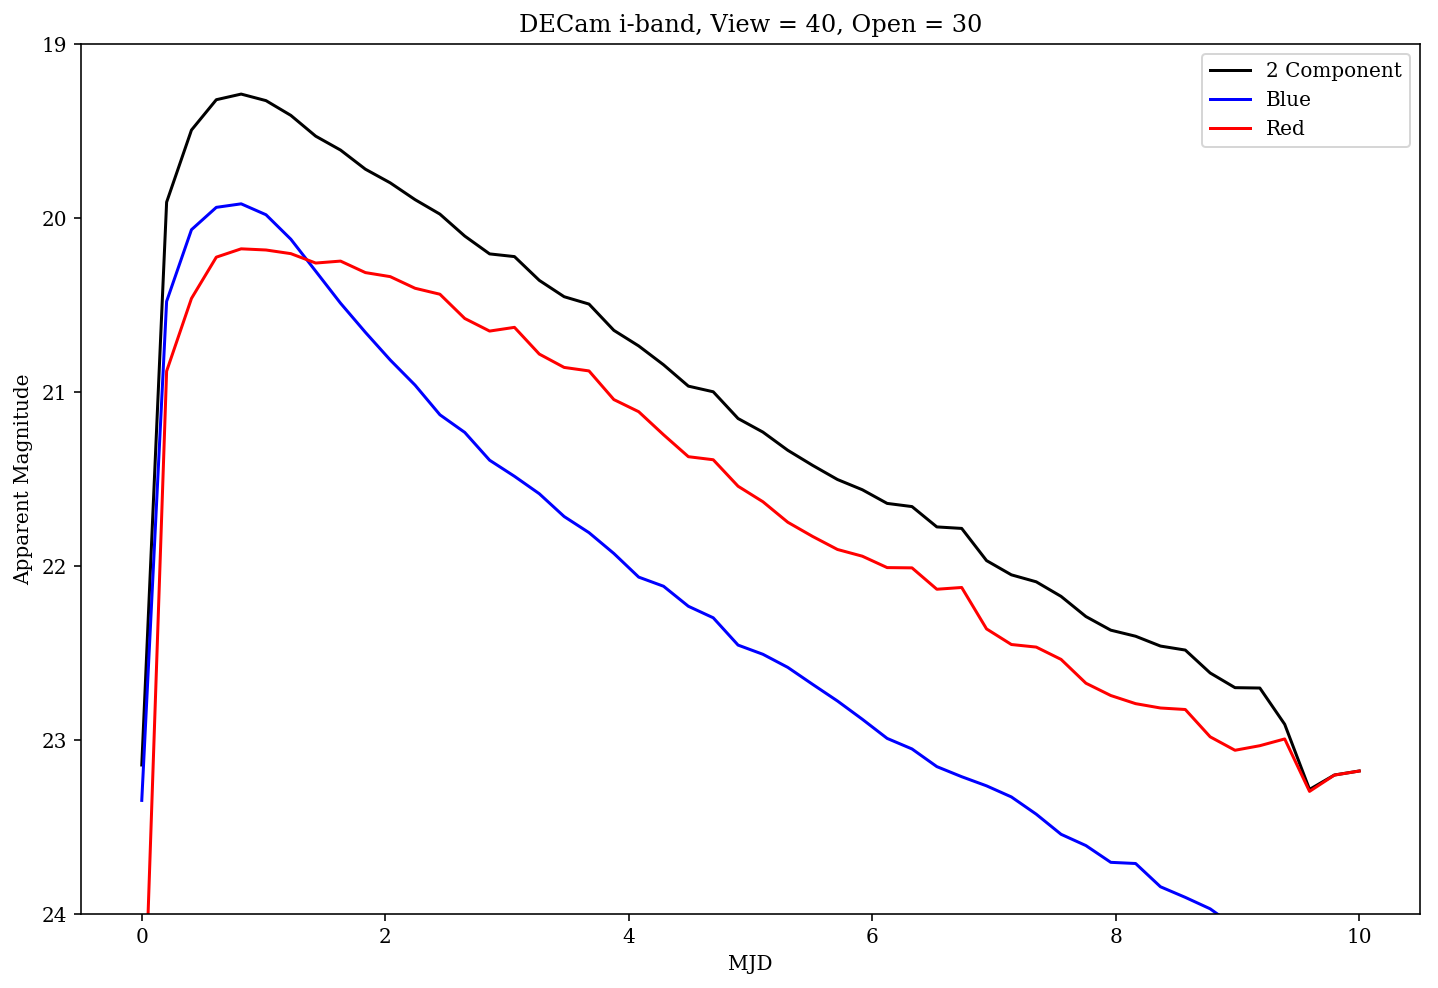

In [8]:
fig = plt.figure(figsize=(12,8))
plt.gca().invert_yaxis()
plt.gca().set_ylim(bottom=24, top=19)
plt.gca().set_xlabel('MJD')
plt.gca().set_ylabel('Apparent Magnitude')

plt.plot(double_time, double_mag, 'k-', label='2 Component')
plt.plot(blue_time_w, blue_mag_w, 'b-', label='Blue')
plt.plot(red_time_w, red_mag_w, 'r-', label='Red')

plt.title('DECam i-band, View = 40, Open = 30')
plt.legend()

Okay, so now we want to look at the 2 component model, from different viewing angles and also what that does to the red and blue

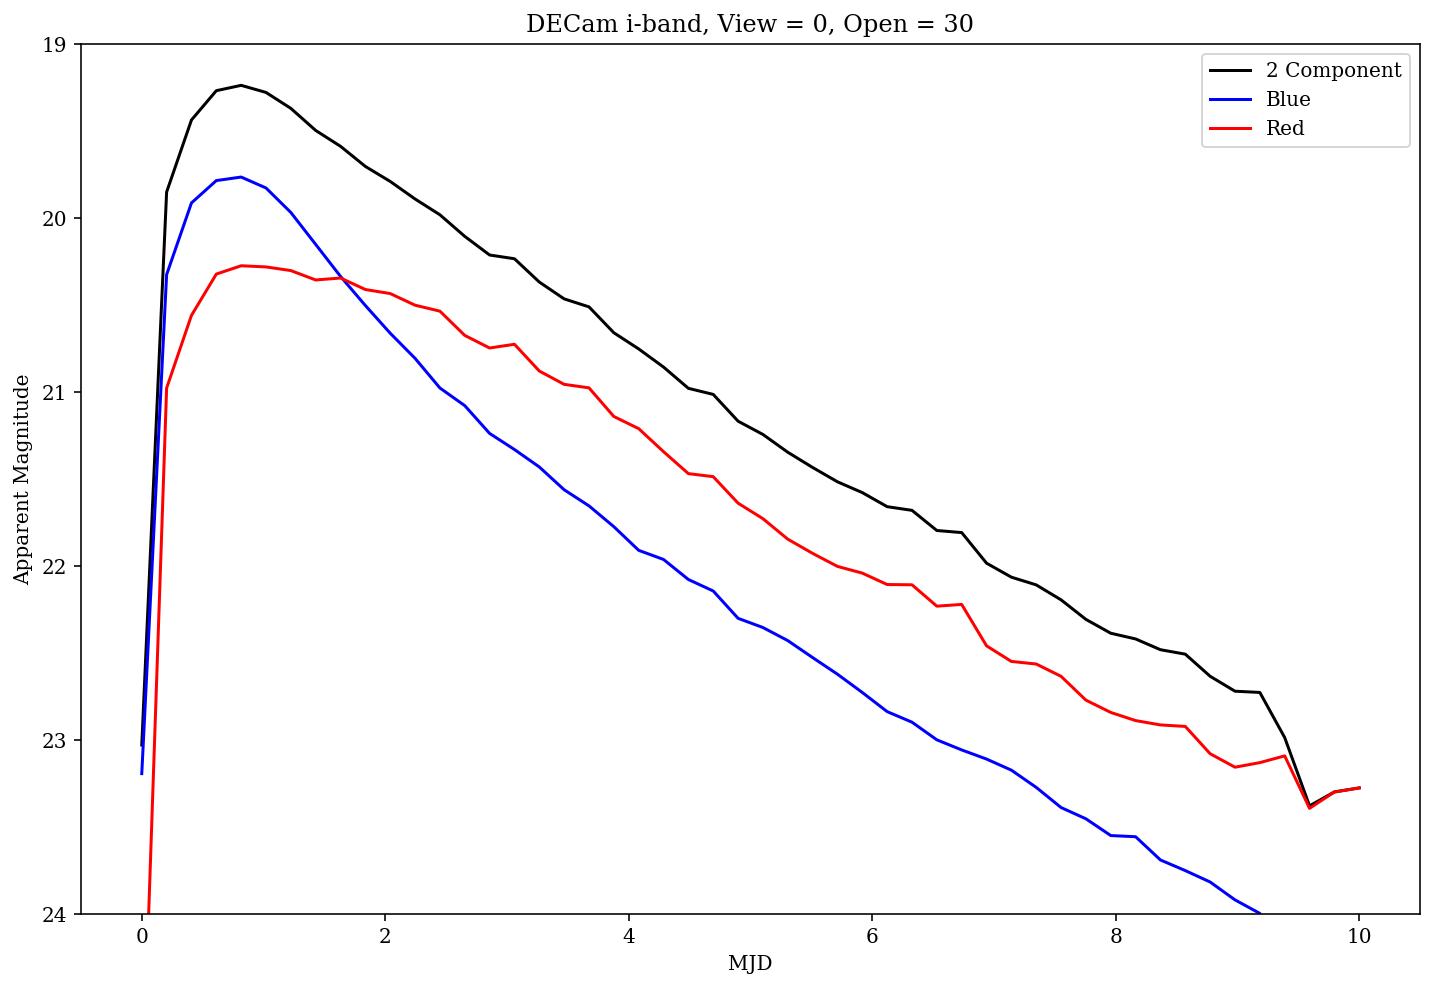

In [9]:
# THETA = 0
# Read in red single 
with open('./angles/0/red/products/walkers.json', 'r') as f:
    data = json.loads(f.read())
    if 'name' not in data:
        data = data[list(data.keys())[0]]
red = data['photometry']
# Read in blue single
with open('./angles/0/blue/products/walkers.json', 'r') as f:
    data = json.loads(f.read())
    if 'name' not in data:
        data = data[list(data.keys())[0]]
blue = data['photometry']
# Read in double
with open('./angles/0/2c/products/walkers.json', 'r') as f:
    data = json.loads(f.read())
    if 'name' not in data:
        data = data[list(data.keys())[0]]
double = data['photometry']

red_time_w = []
red_mag_w = []
for i in red:
    red_time_w.append(float(i['time']))
    red_mag_w.append(float(i['magnitude']))
    
blue_time_w = []
blue_mag_w = []
for i in blue:
    blue_time_w.append(float(i['time']))
    blue_mag_w.append(float(i['magnitude']))
    


double_time0 = []
double_mag0 = []
for i in double:
    double_time0.append(float(i['time']))
    double_mag0.append(float(i['magnitude']))
    
fig = plt.figure(figsize=(12,8))
plt.gca().invert_yaxis()
plt.gca().set_ylim(bottom=24, top=19)
plt.gca().set_xlabel('MJD')
plt.gca().set_ylabel('Apparent Magnitude')

plt.plot(double_time0, double_mag0, 'k-', label='2 Component')
plt.plot(blue_time_w, blue_mag_w, 'b-', label='Blue')
plt.plot(red_time_w, red_mag_w, 'r-', label='Red')

plt.title('DECam i-band, View = 0, Open = 30')
plt.legend()

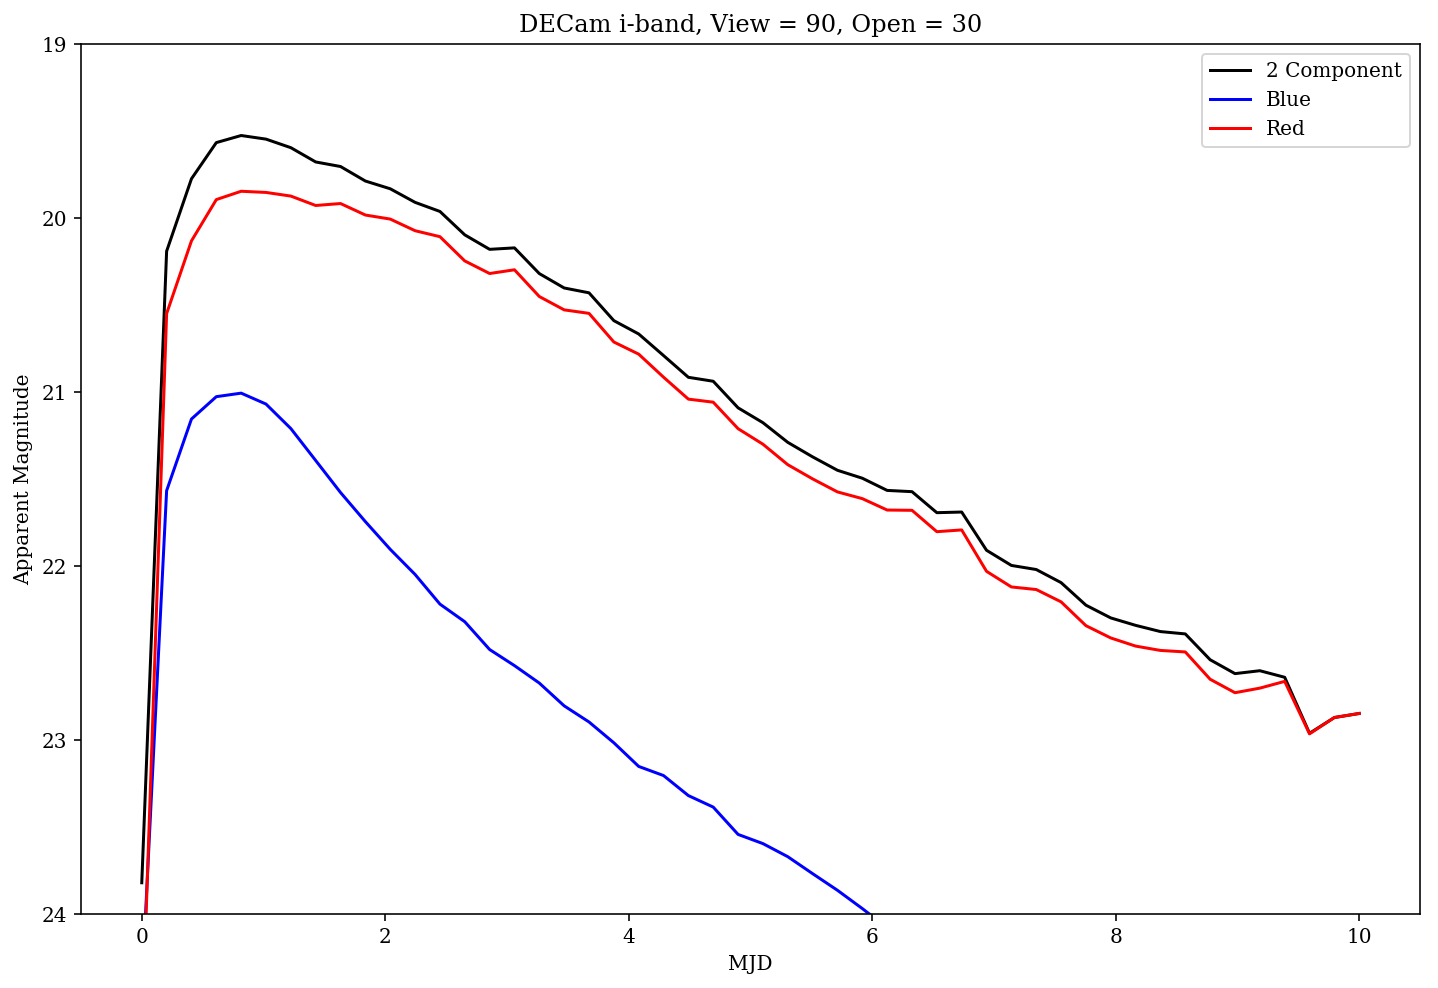

In [10]:
# THETA = 90
# Read in red single 
with open('./angles/90/red/products/walkers.json', 'r') as f:
    data = json.loads(f.read())
    if 'name' not in data:
        data = data[list(data.keys())[0]]
red = data['photometry']
# Read in blue single
with open('./angles/90/blue/products/walkers.json', 'r') as f:
    data = json.loads(f.read())
    if 'name' not in data:
        data = data[list(data.keys())[0]]
blue = data['photometry']
# Read in double
with open('./angles/90/2c/products/walkers.json', 'r') as f:
    data = json.loads(f.read())
    if 'name' not in data:
        data = data[list(data.keys())[0]]
double = data['photometry']

red_time_w = []
red_mag_w = []
for i in red:
    red_time_w.append(float(i['time']))
    red_mag_w.append(float(i['magnitude']))
    
blue_time_w = []
blue_mag_w = []
for i in blue:
    blue_time_w.append(float(i['time']))
    blue_mag_w.append(float(i['magnitude']))
    


double_time90 = []
double_mag90 = []
for i in double:
    double_time90.append(float(i['time']))
    double_mag90.append(float(i['magnitude']))
    
fig = plt.figure(figsize=(12,8))
plt.gca().invert_yaxis()
plt.gca().set_ylim(bottom=24, top=19)
plt.gca().set_xlabel('MJD')
plt.gca().set_ylabel('Apparent Magnitude')

plt.plot(double_time90, double_mag90, 'k-', label='2 Component')
plt.plot(blue_time_w, blue_mag_w, 'b-', label='Blue')
plt.plot(red_time_w, red_mag_w, 'r-', label='Red')

plt.title('DECam i-band, View = 90, Open = 30')
plt.legend()

Plotted below are the 2 component models, according to the viewing angle

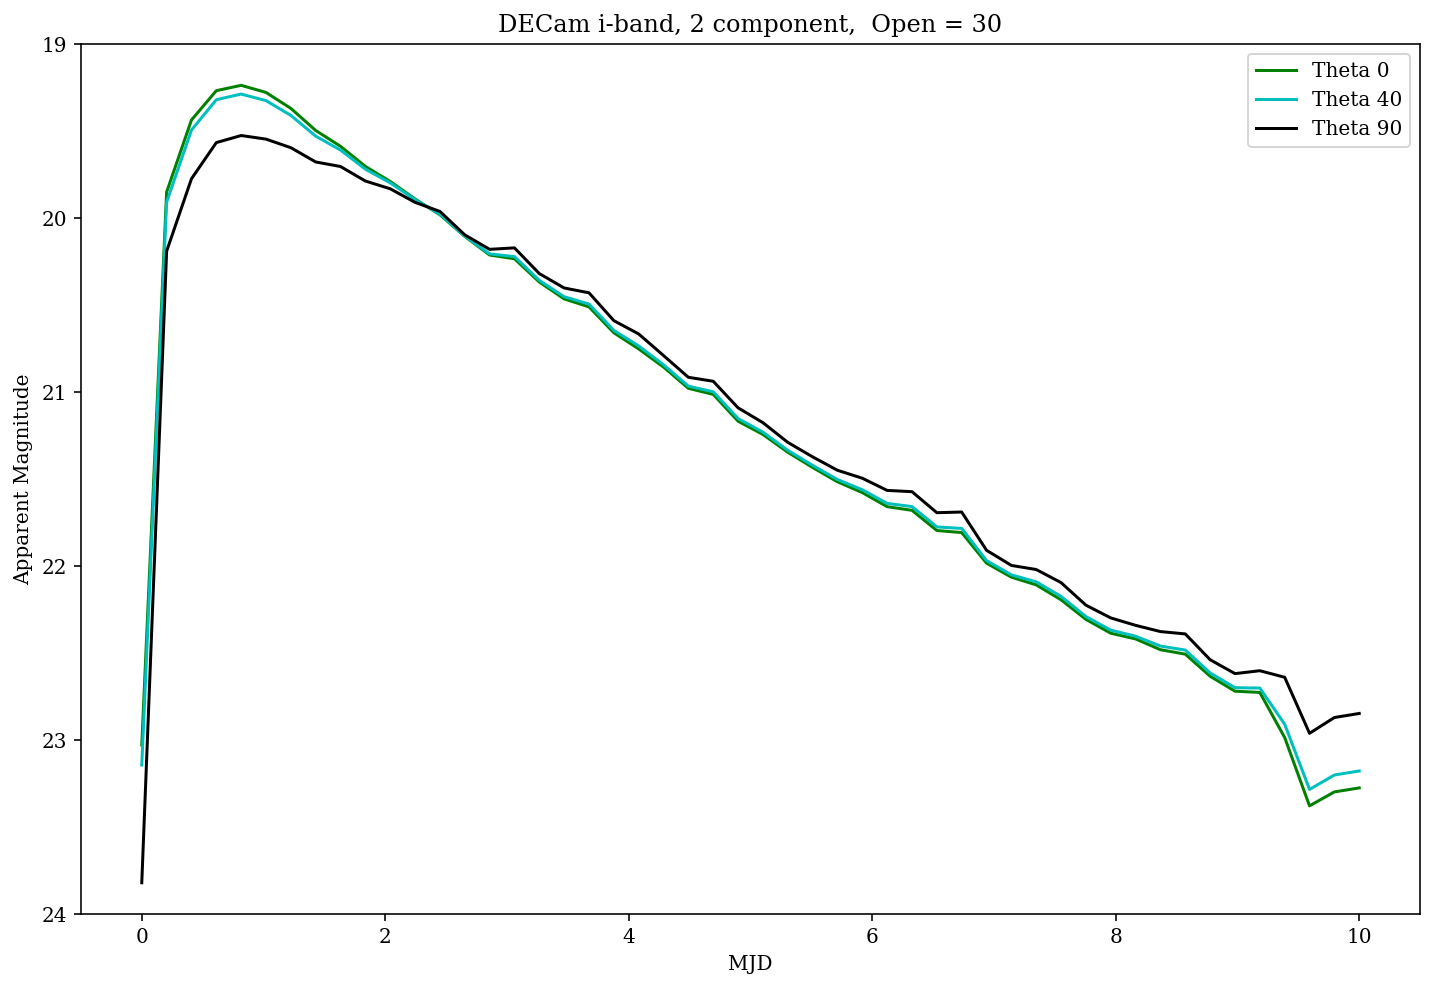

In [12]:
fig = plt.figure(figsize=(12,8))
plt.gca().invert_yaxis()
plt.gca().set_ylim(bottom=24, top=19)
plt.gca().set_xlabel('MJD')
plt.gca().set_ylabel('Apparent Magnitude')

plt.plot(double_time0, double_mag0, 'g-', label='Theta 0 ')
plt.plot(double_time, double_mag, 'c-', label='Theta 40')
plt.plot(double_time90, double_mag90, 'k-', label='Theta 90')

plt.title('DECam i-band, 2 component,  Open = 30')
plt.legend()